In [216]:
##Import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [217]:
##Import dataset
data = 'Balance scale'
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data', header=None, names=['Class Name', 'Left-Weight', 'Left-Distance', 'Right-Weight', 'Right-Distance'])


In [218]:
##Check shape of the dataset
df.shape

(625, 5)

In [219]:
##Preview the dataset
df.head()

,Class Name,Left-Weight,Left-Distance,Right-Weight,Right-Distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [220]:
##View summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Class Name      625 non-null    object
 1   Left-Weight     625 non-null    int64 
 2   Left-Distance   625 non-null    int64 
 3   Right-Weight    625 non-null    int64 
 4   Right-Distance  625 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 24.5+ KB


In [221]:
df.isnull().sum()

Class Name        0
Left-Weight       0
Left-Distance     0
Right-Weight      0
Right-Distance    0
dtype: int64

In [222]:
#Drop redundant columns
df.drop

<bound method DataFrame.drop of     Class Name  Left-Weight  Left-Distance  Right-Weight  Right-Distance
0            B            1              1             1               1
1            R            1              1             1               2
2            R            1              1             1               3
3            R            1              1             1               4
4            R            1              1             1               5
..         ...          ...            ...           ...             ...
620          L            5              5             5               1
621          L            5              5             5               2
622          L            5              5             5               3
623          L            5              5             5               4
624          B            5              5             5               5

[625 rows x 5 columns]>

In [223]:
#Again view summary of dataset
df.describe()

,Left-Weight,Left-Distance,Right-Weight,Right-Distance
count,625.000000,625.000000,625.000000,625.000000
mean,3.000000,3.000000,3.000000,3.000000
std,1.415346,1.415346,1.415346,1.415346
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


In [224]:
df['Class Name'].unique()

array(['B', 'R', 'L'], dtype=object)

In [225]:
len(df['Class Name'].unique())

3

In [226]:
df['Left-Weight'].unique()

array([1, 2, 3, 4, 5])

In [227]:
len(df['Left-Weight'].unique())

5

In [228]:
df['Right-Weight'].unique()

array([1, 2, 3, 4, 5])

In [229]:
len(df['Right-Weight'].unique())

5

In [230]:
df.drop(['Class Name','Left-Weight'], axis=1, inplace=True)

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Left-Distance   625 non-null    int64
 1   Right-Weight    625 non-null    int64
 2   Right-Distance  625 non-null    int64
dtypes: int64(3)
memory usage: 14.8 KB


In [232]:
df.head()

,Left-Distance,Right-Weight,Right-Distance
0,1,1,1
1,1,1,2
2,1,1,3
3,1,1,4
4,1,1,5


In [233]:
X = df

y = df['Right-Weight']

In [234]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

In [235]:
kmeans.cluster_centers_

array([[3.23809524, 3.04761905, 4.19047619],
       [2.75806452, 2.9516129 , 1.79032258]])

In [236]:
kmeans.inertia_

2812.4999999999995

In [237]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 65 out of 625 samples were correctly labeled.


In [238]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.10


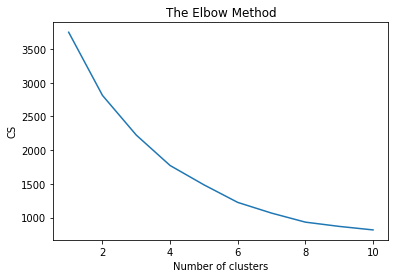

In [239]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 625, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [240]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2,random_state=0)

kmeans.fit(X)

labels = kmeans.labels_

# check how many of the samples were correctly labeled

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))


Result: 65 out of 625 samples were correctly labeled.


In [241]:
kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 150 out of 625 samples were correctly labeled.
Accuracy score: 0.24


In [242]:
kmeans = KMeans(n_clusters=4, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 170 out of 625 samples were correctly labeled.
Accuracy score: 0.27
